In [3]:
from utils import load_dataset, train_model, grid_search_VD, grid_search_anchors
import numpy as np
import pickle

# Flame

In [2]:
dataset = "flame"
model_name = "m0"
X_train, X_test, y_train, y_test, X, y, feature_names = load_dataset(dataset)
model = train_model(X_train,y_train, model_name)
print(model.score(X, y))
print(model.score(X_test, y_test))

Validity domain approximation

In [3]:
# gammas = np.arange(1,20)
# tds = np.arange(0.1, 2, 0.1)
# gammas = np.arange(1,3)
# tds = np.arange(0.1, 0.3, 0.1)
gammas = np.linspace(1, 20, 20)
tds = np.linspace(0.1, 2, 20)

100%|██████████| 400/400 [05:05<00:00,  1.31it/s]


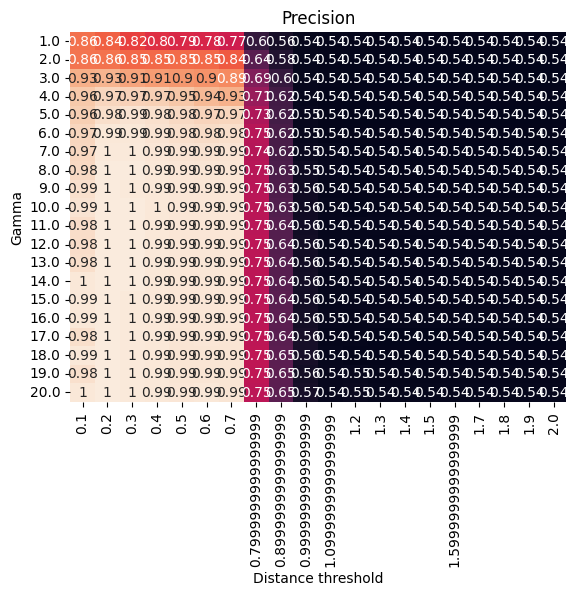

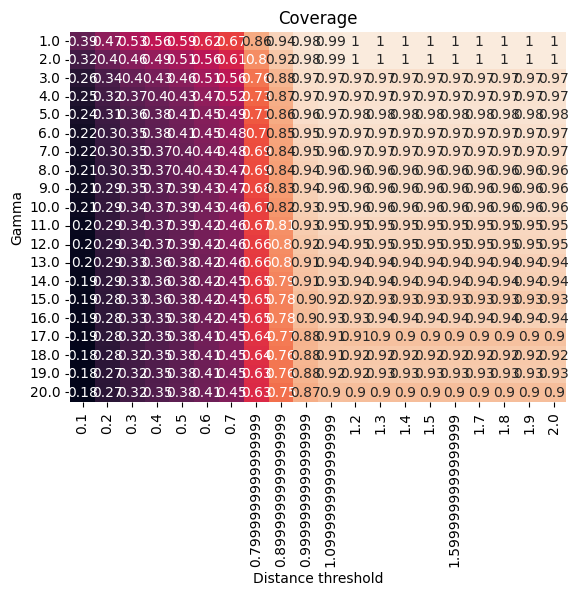

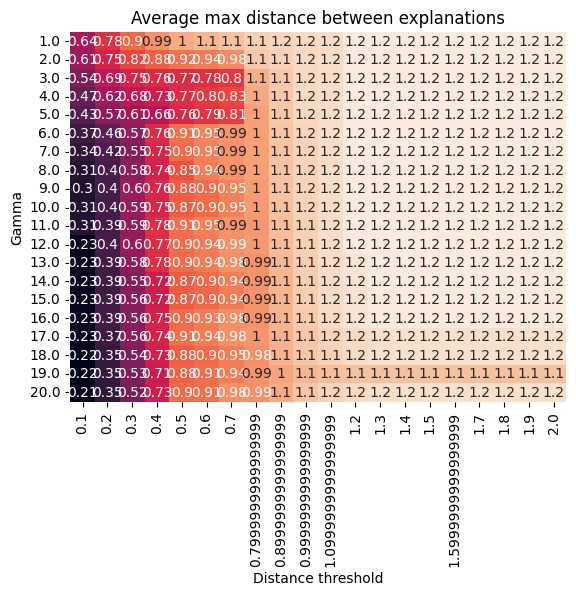

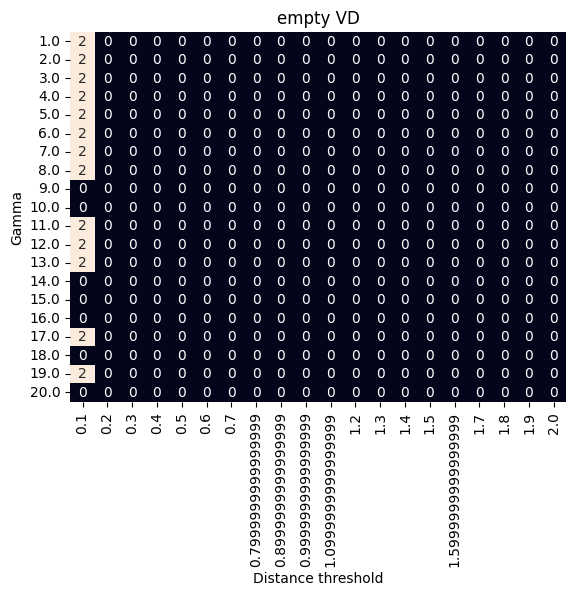

In [4]:
results_grid_VD = grid_search_VD(gammas, tds, X, X_train, feature_names, model)

In [5]:
pickle.dump(results_grid_VD, open("results_exp/"+dataset+"_VD.p", "wb"))

In [6]:
mean_precs, mean_cov, mean_dist_exp, empty_VDs, hp_values, std_precs, std_covs, std_dist_exp = results_grid_VD

In [7]:
def best_hp_VD(mean_precs, mean_cov, mean_dist_exp, empty_VDs):
    return np.argmax(np.asarray(mean_precs)+np.asarray(mean_cov)-np.asarray(mean_dist_exp)-np.asarray(empty_VDs))

In [8]:
best = best_hp_VD(mean_precs, mean_cov, mean_dist_exp, empty_VDs)
print("Best score :")
print(best)
print("hp values",hp_values[best])
print("Avg Precision",mean_precs[best],"+/-",std_precs[best])
print("Avg Coverage",mean_cov[best],"+/-",std_covs[best])
print("Avg Max Dist Exp",mean_dist_exp[best],"+/-",std_dist_exp[best])
print("Nb empty VD",empty_VDs[best])

Best score :
380
hp values (20.0, 0.1)
Avg Precision 0.9951822916666666 +/- 0.029168701100922033
Avg Coverage 0.18142361111111108 +/- 0.10007396835136252
Avg Max Dist Exp 0.212310940523359 +/- 0.1412079655475806
Nb empty VD 0


Anchors

In [10]:
deltas = [0.05,0.1]
taus = [0.1,0.15]
Bs = [10,50,100]
# threshold_prec = mean_precs[best]
threshold_prec = 1
tries = np.linspace(1, 5, 5)

In [11]:
results_grid_anchors = grid_search_anchors(X, y, X_train, feature_names, model, deltas, taus, Bs, threshold_prec, tries)

100%|██████████| 60/60 [09:21<00:00,  9.36s/it]


In [12]:
pickle.dump(results_grid_anchors, open("results_exp/"+dataset+"_anchors.p", "wb"))

In [13]:
mean_precs, mean_cov, mean_dist_exp, hp_values, std_precs, std_covs, std_dist_exp = results_grid_anchors

In [10]:
def best_hp_anchors(mean_precs, mean_cov):
    return np.argmax(np.asarray(mean_precs)+np.asarray(mean_cov))

In [16]:
best = best_hp_anchors(mean_precs, mean_cov)
print("Best score :")
print(best)
print("hp values", hp_values[best])
print("Avg Precision",mean_precs[best],"+/-",std_precs[best])
print("Avg Coverage",mean_cov[best],"+/-",std_covs[best])
print("Avg Max Dist Exp",mean_dist_exp[best],"+/-",std_dist_exp[best])

Best score :
23
hp values (0.05, 0.15, 50, 4.0)
Avg Precision 0.980921834539665 +/- 0.04351933256917468
Avg Coverage 0.19309895833333335 +/- 0.09776385853653674
Avg Max Dist Exp 0.561912503201763 +/- 0.3008649253882245


# Iris

# Adult

In [3]:
dataset = "adult"
model_name = "m0"
X_train, X_test, y_train, y_test, X, y, feature_names = load_dataset(dataset)
# model = train_model(X_train,y_train, model_name)
# print(model.score(X, y))
# print(model.score(X_test, y_test))

Validity domain approximation

In [7]:
gammas = np.arange(1,3)
tds = np.arange(0.1, 0.3, 0.1)
# gammas = np.linspace(1, 20, 20)
# tds = np.linspace(0.1, 2, 20)

In [8]:
results_grid_VD = grid_search_VD(gammas, tds, X, X_train, feature_names, model)

Permutation explainer:  26%|██▌       | 8475/32561 [10:52<34:10, 11.75it/s]  

KeyboardInterrupt: 

Permutation explainer:  26%|██▌       | 8475/32561 [11:10<34:10, 11.75it/s]

In [ ]:
# pickle.dump(results_grid_VD, open("results_exp/"+dataset+"_VD.p", "wb"))

In [ ]:
mean_precs, mean_cov, mean_dist_exp, empty_VDs, hp_values, std_precs, std_covs, std_dist_exp = results_grid_VD

In [ ]:
def best_hp_VD(mean_precs, mean_cov, mean_dist_exp, empty_VDs):
    return np.argmax(np.asarray(mean_precs)+np.asarray(mean_cov)-np.asarray(mean_dist_exp)-np.asarray(empty_VDs))

In [ ]:
best = best_hp_VD(mean_precs, mean_cov, mean_dist_exp, empty_VDs)
print("Best score :")
print(best)
print("hp values",hp_values[best])
print("Avg Precision",mean_precs[best],"+/-",std_precs[best])
print("Avg Coverage",mean_cov[best],"+/-",std_covs[best])
print("Avg Max Dist Exp",mean_dist_exp[best],"+/-",std_dist_exp[best])
print("Nb empty VD",empty_VDs[best])

Best score :
380
hp values (20.0, 0.1)
Avg Precision 0.9951822916666666 +/- 0.029168701100922033
Avg Coverage 0.18142361111111108 +/- 0.10007396835136252
Avg Max Dist Exp 0.212310940523359 +/- 0.1412079655475806
Nb empty VD 0


In [ ]:
# Check
# prec_cov("flame", 0.2,2)

Anchors

In [9]:
deltas = [0.05,0.1]
taus = [0.1,0.15]
Bs = [10,50,100]
# threshold_prec = mean_precs[best]
threshold_prec = 1
# tries = np.linspace(1, 5, 5)
tries = [1]

In [11]:
results_grid_anchors = grid_search_anchors(X, y, X_train, feature_names, model, deltas, taus, Bs, threshold_prec, tries)

Permutation explainer: 179it [00:10,  1.48s/it]                         
  0%|          | 0/12 [00:00<?, ?it/s]





















  0%|          | 0/12 [03:00<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
pickle.dump(results_grid_anchors, open("results_exp/"+dataset+"_anchors.p", "wb"))

In [ ]:
mean_precs, mean_cov, mean_dist_exp, hp_values, std_precs, std_covs, std_dist_exp = results_grid_anchors

In [ ]:
def best_hp_anchors(mean_precs, mean_cov):
    return np.argmax(np.asarray(mean_precs)+np.asarray(mean_cov))

In [ ]:
best = best_hp_anchors(mean_precs, mean_cov)
print("Best score :")
print(best)
print("hp values", hp_values[best])
print("Avg Precision",mean_precs[best],"+/-",std_precs[best])
print("Avg Coverage",mean_cov[best],"+/-",std_covs[best])
print("Avg Max Dist Exp",mean_dist_exp[best],"+/-",std_dist_exp[best])

Best score :
23
hp values (0.05, 0.15, 50, 4.0)
Avg Precision 0.980921834539665 +/- 0.04351933256917468
Avg Coverage 0.19309895833333335 +/- 0.09776385853653674
Avg Max Dist Exp 0.561912503201763 +/- 0.3008649253882245


In [66]:
X_train, X_test, y_train, y_test, X, y, feature_names = load_dataset("iris")

In [90]:
id_train = [np.where(np.all(X==X_train[i], axis=1))[0][0] for i in range(len(X_train))]
np.all(X_train == X[id_train])

True

# Load from pickle

In [35]:
def best_hp_prec(mean_precs, mean_cov):
    return np.argmax(1000*np.asarray(mean_precs)+np.asarray(mean_cov))

def best_hp_prec_v2(mean_precs, d, mean_cov):
    mean_precs = np.asarray(mean_precs)
    mean_precs[np.where(d>0.5)] = 0
    return np.argmax(1000*np.asarray(mean_precs)+np.asarray(mean_cov))

def closest_mdo(mean_mdo, mdo):
    return np.argmin(np.abs(np.asarray(mean_mdo)-mdo))

def get_best_hp(dataset, method, mdo=0):
    results = pickle.load(open("results_exp/"+dataset+"_"+method+".p", "rb"))
    mean_precs = np.mean(results['precisions'],axis=1)
    mean_cov = np.mean(results['coverages'],axis=1)
    mean_mdo = np.mean(results['mdos'],axis=1)
    std_precs = np.std(results['precisions'],axis=1)
    std_cov = np.std(results['coverages'],axis=1)
    std_mdo = np.std(results['mdos'],axis=1)
    best = best_hp_prec(mean_precs, mean_cov)
    print("Best score :")
    print(best)
    print("hp values", results['hp'][best])
    print("Avg Precision", mean_precs[best], "+/-", std_precs[best])
    print("Avg Coverage", mean_cov[best], "+/-", std_cov[best])
    print("Avg MDO", mean_mdo[best], "+/-", std_mdo[best])
    if method=="VD":
        print("empty VDs", results['empty VDs'][best])
        # print("----------------")
        # print("closest mdo")
        # closest = closest_mdo(mean_mdo, mdo)
        # print(closest)
        # print("hp values", results['hp'][closest])
        # print("Avg Precision", mean_precs[closest], "+/-", std_precs[closest])
        # print("Avg Coverage", mean_cov[closest], "+/-", std_cov[closest])
        # print("Avg MDO", mean_mdo[closest], "+/-", std_mdo[closest])
        # print("every mdo")
        # print(mean_mdo)

def get_best_hp_v2(dataset, method, mdo=0):
    results = pickle.load(open("results_exp/"+dataset+"_"+method+".p", "rb"))
    mean_precs = np.mean(results['precisions'],axis=1)
    mean_cov = np.mean(results['coverages'],axis=1)
    mean_mdo = np.mean(results['mdos'],axis=1)
    std_precs = np.std(results['precisions'],axis=1)
    std_cov = np.std(results['coverages'],axis=1)
    std_mdo = np.std(results['mdos'],axis=1)
    d = np.asarray(results['hp'])[:,1]
    best = best_hp_prec_v2(mean_precs, d, mean_cov)
    print("Best score :")
    print(best)
    print("hp values", results['hp'][best])
    print("Avg Precision", mean_precs[best], "+/-", std_precs[best])
    print("Avg Coverage", mean_cov[best], "+/-", std_cov[best])
    print("Avg MDO", mean_mdo[best], "+/-", std_mdo[best])
    if method=="VD":
        print("empty VDs", results['empty VDs'][best])

In [11]:
results = pickle.load(open("results_exp/breast_c_vd.p", "rb"))

In [17]:
np.asarray(results['hp'])[:,1]

array([0.05, 0.05, 0.05, ..., 2.95, 2.95, 2.95])

In [43]:
results['mdos'] = results['coverages'][60:]

In [44]:
tmp = results['coverages']

In [45]:
results['coverages'] = results['coverages'][:60]

In [46]:
pickle.dump(results, open("results_exp/breast_c_anchors.p", "wb"))

Flame

In [6]:
get_best_hp(dataset="flame", method="VD")

Best score :
265
hp values (6.0, 0.7000000000000001)
Avg Precision 1.0 +/- 0.0
Avg Coverage 0.2227213541666666 +/- 0.08596726027470258
Avg MDO 0.806887283166534 +/- 0.13840887165577812
empty VDs 0


In [36]:
get_best_hp_v2(dataset="flame", method="VD")

Best score :
188
hp values (9.0, 0.5)
Avg Precision 1.0 +/- 0.0
Avg Coverage 0.18776041666666665 +/- 0.05597868110910865
Avg MDO 0.7914652753573584 +/- 0.1589994682004625
empty VDs 0


In [7]:
get_best_hp(dataset="flame", method="anchors")

Best score :
19
hp values (0.05, 0.15, 10, 5)
Avg Precision 0.9823960728191015 +/- 0.042937926385893756
Avg Coverage 0.1821831597222222 +/- 0.08345497295873945
Avg MDO 0.521607717289626 +/- 0.12235697699567219


Iris

In [37]:
get_best_hp(dataset="iris", method="VD")

Best score :
229
hp values (10.0, 0.6000000000000001)
Avg Precision 1.0 +/- 0.0
Avg Coverage 0.2783333333333334 +/- 0.036780127484523195
Avg MDO 0.5296524522226148 +/- 0.037317739128006545
empty VDs 0


In [38]:
get_best_hp_v2(dataset="iris", method="VD")

Best score :
144
hp values (5.0, 0.4)
Avg Precision 1.0 +/- 0.0
Avg Coverage 0.2647222222222222 +/- 0.03263031802359559
Avg MDO 0.42654448897377845 +/- 0.047621198863801145
empty VDs 0


In [42]:
get_best_hp(dataset="iris", method="anchors")

Best score :
45
hp values (0.1, 0.15, 10, 1)
Avg Precision 0.9817593335301912 +/- 0.049633494121998016
Avg Coverage 0.09533333333333333 +/- 0.07870055767132643
Avg MDO 0.2548391258832277 +/- 0.17833163948611144


(Nope) Breast tissue

In [5]:
get_best_hp(dataset="breast", method="VD")

Best score :
158
hp values (19.0, 0.4)
Avg Precision 0.8922466422466423 +/- 0.1661153538667678
Avg Coverage 0.06390386343216531 +/- 0.04326494827846733
Avg MDO 0.38604785056209884 +/- 0.160757108823767
empty VDs 0


In [ ]:
# from utils import compute_VD_and_scores_v2, load_dataset, train_model
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import pairwise_distances
# import shap
# import numpy as np
# dataset = "breast"
# model_name = "m1"
# X_train, X_test, y_train, y_test, X, y, feature_names = load_dataset(dataset)
# print("Training model")
# model = train_model(X_train, y_train, model_name)
# print(model.score(X, y))
# print(model.score(X_test, y_test))
# scaler = MinMaxScaler()
# y_pred = model.predict(X_train)
# # path = "results_exp/shap_values/"+dataset+".p"
# # shap_values = pickle.load(open(path, "rb"))
# explainer = shap.Explainer(model.predict,X_train,feature_names=feature_names)
# shap_values = explainer(X_train)

# shap_values = np.asarray(shap_values.values)
# threshold_diff = 0.4
# gamma = 50
# metric = "euclidean"

# dists_exp = {c : scaler.fit_transform(pairwise_distances(shap_values[np.where(y_pred==c)], metric=metric)) for c in np.unique(y)}
# precs, coverages, dist_exp, empty_VD, mdos = compute_VD_and_scores_v2(X, X_train, y, model,threshold_diff, gamma, dists_exp, replace_empty=True, lim = 500)

In [3]:
# print(precs)
# print(np.mean(precs))

[1.0, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.5, 1.0, 1.0, 1.0, 0.5, 0, 1.0, 0.5, 0, 0.6666666666666666, 0.5, 1.0, 0, 1.0, 0.5, 0.6666666666666666, 1.0, 1.0, 0.6666666666666666, 1.0, 0.5, 1.0, 1.0, 0.6666666666666666, 1.0, 0, 0, 0.6666666666666666, 1.0, 0.5, 1.0, 0.6666666666666666, 1.0, 1.0, 0.5, 1.0, 0, 1.0, 1.0, 0, 0, 1.0, 0.5, 0, 0.5, 1.0, 1.0, 0, 1.0, 0.5, 1.0, 0.5, 0, 1.0, 1.0, 0.6666666666666666, 0, 1.0, 1.0, 0, 0.5, 0.6666666666666666, 0, 1.0, 0.5, 0.6666666666666666, 1.0, 0.6666666666666666, 0, 0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0.5, 0]
0.6329365079365078


In [8]:
get_best_hp(dataset="breast", method="anchors")

Best score :
33
hp values [0.1, 0.1, 10, 4]
Avg Precision 0.9817062300690198 +/- 0.057228199189516334
Avg Coverage 0.03616352201257862 +/- 0.04025806467182904


Wine

In [9]:
get_best_hp(dataset="wine", method="VD")

Best score :
383
hp values (4.0, 1.0)
Avg Precision 1.0 +/- 0.0
Avg Coverage 0.22353220446273145 +/- 0.032029696491092496
Avg MDO 0.7090750723055836 +/- 0.14772724143812102
empty VDs 0


In [39]:
get_best_hp_v2(dataset="wine", method="VD")

Best score :
184
hp values (5.0, 0.5)
Avg Precision 1.0 +/- 0.0
Avg Coverage 0.11694888431713879 +/- 0.06687490683919473
Avg MDO 0.44245472367585637 +/- 0.205311680906529
empty VDs 0


In [51]:
get_best_hp(dataset="wine", method="anchors")

Best score :
18
hp values [0.05, 0.15, 10, 4]
Avg Precision 1.0 +/- 0.0
Avg Coverage 0.1154454818800443 +/- 0.05557747027811031
Avg MDO 0.5398149021858393 +/- 0.1177301103842881


Breast Cancer Coimbra

In [14]:
get_best_hp(dataset="breast_c", method="VD")

Best score :
399
hp values (20.0, 1.0)
Avg Precision 1.0 +/- 0.0
Avg Coverage 0.17841079460269868 +/- 0.01282056325073993
Avg MDO 0.8163773253863909 +/- 0.08791855108183781
empty VDs 0


In [41]:
get_best_hp_v2(dataset="breast_c", method="VD")

Best score :
197
hp values (18.0, 0.5)
Avg Precision 1.0 +/- 0.0
Avg Coverage 0.08808095952023988 +/- 0.04700873191937976
Avg MDO 0.4580857752678959 +/- 0.09800225620278993
empty VDs 0


In [52]:
get_best_hp(dataset="breast_c", method="anchors")

Best score :
59
hp values [0.1, 0.15, 100, 5]
Avg Precision 1.0 +/- 0.0
Avg Coverage 0.03738755622188906 +/- 0.027269226164107353
Avg MDO 0.33465814530269317 +/- 0.2232783319528728


In [12]:
results = pickle.load(open("results_exp/breast_c_VD.p", "rb"))

In [15]:
mean_precs = np.mean(results['precisions'],axis=1)
mean_cov = np.mean(results['coverages'],axis=1)
print(mean_precs)
print(mean_cov)

[0.         0.         0.         ... 0.98115942 0.98050975 1.        ]
[0.         0.         0.         ... 0.22488756 0.20877061 0.17841079]


Adult

In [15]:
get_best_hp(dataset="adult_mini", method="VD")

Best score :
135
hp values (16.0, 0.35000000000000003)
Avg Precision 1.0 +/- 0.0
Avg Coverage 0.21993400000000002 +/- 0.08436500248325725
Avg MDO 0.8950772445237537 +/- 0.0357007959023634
empty VDs 0


In [40]:
get_best_hp_v2(dataset="adult_mini", method="VD")

Best score :
135
hp values (16.0, 0.35000000000000003)
Avg Precision 1.0 +/- 0.0
Avg Coverage 0.21993400000000002 +/- 0.08436500248325725
Avg MDO 0.8950772445237537 +/- 0.0357007959023634
empty VDs 0


In [4]:
get_best_hp(dataset="adult", method="anchors")

Best score :
49
hp values [0.1, 0.15, 10, 5]
Avg Precision 0.9715448698176538 +/- 0.08244438471587996
Avg Coverage 0.08039786861582875 +/- 0.10031650421334408
Avg MDO 0.6654633845969411 +/- 0.33010867090317414


(Nope) Loans

In [127]:
get_best_hp(dataset="loans_mini", method="VD")

Best score :
0
hp values (1.0, 0.05)
Avg Precision 1.0 +/- 0.0
Avg Coverage 0.6297916666666669 +/- 0.22749379951867796
empty VDs 0
